In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import pandas as pd
from run_sims import parse_results_file

In [ ]:
# read in random_ablations_results.txt
with open("res/random_ablations_results.json") as f:
    data = json.load(f)

df_init = pd.DataFrame(data)

df = pd.DataFrame()
for split in ['info_all', 'info_none', 'info_pruneonly', 'info_noprune']:
    df_split = df_init[['k', split]]
    # turn the dict of df_split[split] into columns
    df_cols = pd.json_normalize(df_split[split])
    df_cols['k'] = df_split['k']
    df_cols['optimization'] = split.split('_')[1]
    df = pd.concat([df, df_cols], axis=0)

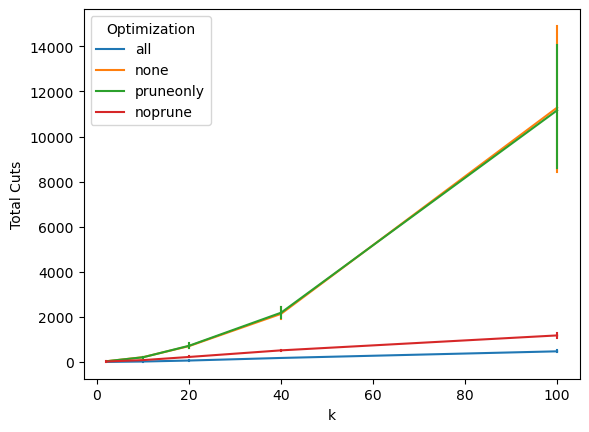

In [36]:
sns.lineplot(data=df, x='k', y='total_cuts', hue='optimization', err_style="bars", errorbar=('ci', 95))
plt.xlabel('k')
plt.ylabel('Total Cuts')
plt.legend(title='Optimization')
plt.show()

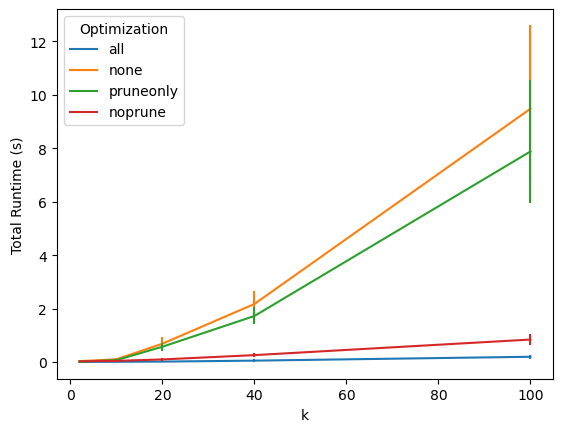

In [37]:
sns.lineplot(data=df, x='k', y='timing.total_time', hue='optimization', err_style="bars", errorbar=('ci', 95))
plt.xlabel('k')
plt.ylabel('Total Runtime (s)')
plt.legend(title='Optimization')
plt.show()

In [91]:
# read in random_ablations_results.txt
with open("res/neurips_ablations_results.json") as f:
    data = json.load(f)

df_init = pd.DataFrame(data)

df = pd.DataFrame()
for split in ['info_all', 'info_none', 'info_pruneonly', 'info_noprune']:
    df_split = df_init[['k', split]].dropna()
    # turn the dict of df_split[split] into columns
    df_cols = pd.json_normalize(df_split[split])
    df_cols['k'] = df_split['k']
    df_cols['optimization'] = split.split('_')[1]
    df = pd.concat([df, df_cols], axis=0)

In [92]:
df[df.k >= 1000]

,iterations,convergence,total_cuts,n_vars,n_chains,n_mono_constraints,timing.symmetry_setup,timing.monotonicity_constraints_setup,timing.optimization_loop_time,timing.total_time,timing.init_prune_time,k,optimization
10,22,True,5663,164,7,157,0.005778,0.008481,0.695099,20.865254,0.038532,1161,all
10,76,True,14547,593,19,574,0.007547,0.015692,0.881385,93.771145,0.000059,1161,noprune


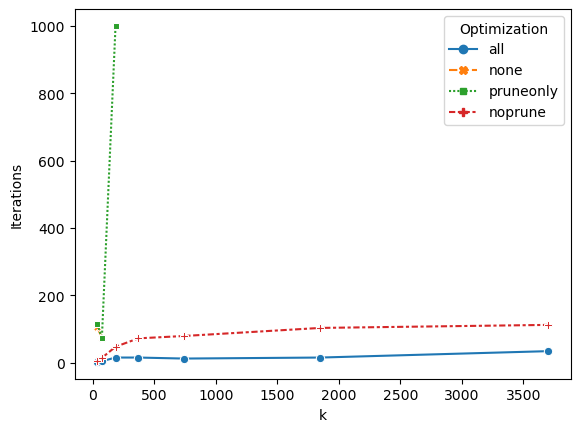

In [85]:
sns.lineplot(data=df, x='k', y='iterations', hue='optimization', markers=True, style='optimization')
plt.xlabel('k')
plt.ylabel('Iterations')
plt.legend(title='Optimization')
plt.show()

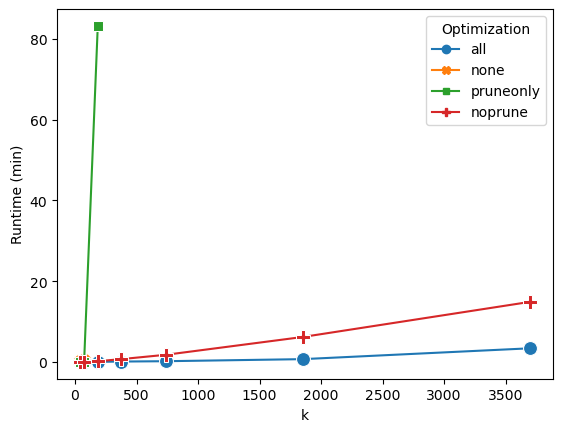

In [86]:
df['minutes'] = df['timing.total_time'] / 60
sns.lineplot(data=df, x='k', y='minutes', hue='optimization', style='optimization', markers=True, dashes=False, markersize=10)
plt.xlabel('k')
plt.ylabel('Runtime (min)')
plt.legend(title='Optimization')
plt.show()

In [2]:
res = parse_results_file("res/swiss_nsf_results.txt")

In [32]:
p_prev = np.zeros(len(res['p_swiss'][0]))
for k, p in enumerate(res['p_swiss']):
    p = np.array(p)
    d = p - p_prev
    # find all indices where d < 0
    indices = np.where(d < -0.01)[0]
    if len(indices) > 0:
        index = indices[0]
        print(f"p: {p[index]}, p_prev:{p_prev[index]} at index {index}, k={k}")
    p_prev = p

p: 0.7857142857142857, p_prev:0.8333333333333334 at index 7, k=17
p: 0.2, p_prev:0.8571428571428571 at index 19, k=19
p: 0.375, p_prev:0.4 at index 19, k=21
p: 0.3076923076923077, p_prev:0.375 at index 19, k=22
p: 0.08333333333333333, p_prev:0.3076923076923077 at index 23, k=23
p: 0.4, p_prev:0.6 at index 27, k=32
p: 0.1875, p_prev:0.4 at index 31, k=33
p: 0.13636363636363635, p_prev:0.1875 at index 32, k=34
p: 0.32142857142857145, p_prev:0.34615384615384615 at index 34, k=42
p: 0.39285714285714285, p_prev:0.4444444444444444 at index 37, k=47
p: 0.3235294117647059, p_prev:0.39285714285714285 at index 38, k=48
p: 0.35135135135135137, p_prev:0.43243243243243246 at index 42, k=54
p: 0.35135135135135137, p_prev:0.4146341463414634 at index 47, k=59
p: 0.37142857142857144, p_prev:0.40540540540540543 at index 50, k=62
p: 0.3333333333333333, p_prev:0.37142857142857144 at index 53, k=63
p: 0.75, p_prev:0.7647058823529411 at index 57, k=81
p: 0.75, p_prev:0.78125 at index 61, k=84
p: 0.71875, p_

105.99999999999993